<a href="https://colab.research.google.com/github/Yousufalipangat/Data-Science/blob/main/Case_Study_Startup_Extension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis: Startup Dataset**

**Feature Details :**

**SNo**- Serial number.

**Date**- Date of funding in format DD/MM/YYYY.

**StartupName**- Name of the startup which got funded.

**IndustryVertical** - Industry to which the startup belongs.

**SubVertical** - Sub-category of the industry type.

**CityLocation** - City which the startup is based out of.

**InvestorsName** - Name of the investors involved in the funding round.

**InvestmentType** - Either Private Equity or Seed Funding.

**AmountInUSD** - Funding Amount in USD.

**Remarks** - Other information, if any.

# Importing Libraries

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [156]:
df = pd.read_csv("startup_funding.csv", index_col = 'Sr No')
display(df.head(10))
display(df.tail(5))

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
Sr No,,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN
7,10/01/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",NaN
8,12/12/2019,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",NaN
9,06/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN


,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
Sr No,,,,,,,,,
3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
3044,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN


In [157]:
df[df["Startup Name"].isin(["boibanit", "oibanit"])]

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
Sr No,,,,,,,,,
2203,03/11/2015,oibanit,Online Food Ordering Marketplace,NaN,Vadodara,"Varun Ahuja, Anubhav Verma",Seed Funding,"1,50,000",NaN


# Data Cleansing and Manuipulations


In [158]:
# finding Datatypes and missings values in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date dd/mm/yyyy    3044 non-null   object
 1   Startup Name       3044 non-null   object
 2   Industry Vertical  2873 non-null   object
 3   SubVertical        2108 non-null   object
 4   City  Location     2864 non-null   object
 5   Investors Name     3020 non-null   object
 6   InvestmentnType    3040 non-null   object
 7   Amount in USD      2084 non-null   object
 8   Remarks            419 non-null    object
dtypes: object(9)
memory usage: 237.8+ KB


In [159]:
df = df.drop(columns="Remarks")

# change the column name 'Date dd/mm/yyyy' tp 'Date' & InvestmentnType
df = df.rename(columns={"Date dd/mm/yyyy":"Date","InvestmentnType":"Investment Type"})

In [160]:
# find number of unique values of each columns
for column in df.columns:
  print(column,':',df[column].nunique())


Date : 1035
Startup Name : 2459
Industry Vertical : 821
SubVertical : 1942
City  Location : 112
Investors Name : 2412
Investment Type : 55
Amount in USD : 471


In [161]:
#converting Date columns datatype to datetime
def to_datetime(date):
  try:
    return pd.to_datetime(date,format='%d/%m/%Y')
  except Exception as e:
    print(e)
    return date

df.Date = df.Date.apply(to_datetime)

print('Date type is',df.Date.dtype)

time data '05/072018' does not match format '%d/%m/%Y' (match)
time data '01/07/015' does not match format '%d/%m/%Y' (match)
time data '\\xc2\\xa010/7/2015' does not match format '%d/%m/%Y' (match)
time data '12/05.2015' does not match format '%d/%m/%Y' (match)
time data '12/05.2015' does not match format '%d/%m/%Y' (match)
time data '13/04.2015' does not match format '%d/%m/%Y' (match)
time data '15/01.2015' does not match format '%d/%m/%Y' (match)
time data '22/01//2015' does not match format '%d/%m/%Y' (match)
Date type is object


In [162]:
# time data '05/072018' is causing issue while parsing, so changing the value
df.Date = df.Date.replace(
{"05/072018":pd.to_datetime('05/07/2018',format='%d/%m/%Y'),
 "01/07/015":pd.to_datetime('01/07/2015',format='%d/%m/%Y'),
 "12/05.2015":pd.to_datetime('12/05/2015',format='%d/%m/%Y'),
 "13/04.2015":pd.to_datetime('13/04/2015',format='%d/%m/%Y'),
 "15/01.2015":pd.to_datetime('15/01/2015',format='%d/%m/%Y'),
 "22/01//2015":pd.to_datetime('22/01/2015',format='%d/%m/%Y'),
 r"\\xc2\\xa010/7/2015":pd.to_datetime('10/07/2015',format='%d/%m/%Y'),

 } )
print('Date type is',df.Date.dtype)

Date type is datetime64[ns]


# Column: 'Start Up'

In [163]:
df2 = df.copy()
print('Number of unique Values',df2['Startup Name'].nunique())
df2['Startup Name'] = df2['Startup Name'].str.lower().str.strip()
print('Number of unique Values after changing to lowercase and trimming',df2['Startup Name'].str.lower().str.strip().nunique())
print("Total number of null values",df2["Startup Name"].isnull().sum())
print("\n")



Number of unique Values 2459
Number of unique Values after changing to lowercase and trimming 2349
Total number of null values 0




In [164]:
#created a DF two understand the columns values
value_count_df = df2['Startup Name'].str.lower().str.strip().value_counts().reset_index().rename(columns={"index":"Startup Name", "Startup Name":"Value counts"})
display(value_count_df)

,Startup Name,Value counts
0,swiggy,8
1,ola cabs,8
2,paytm,7
3,meesho,6
4,blackbuck,6
...,...,...
2344,airmed labs,1
2345,99games,1
2346,loyaltyprime,1
2347,rml agtech,1


In [165]:
#created two new columns to understand how many similar startup names are there the dataset. This is to maily correct the startup name if it is
#represented in two names
value_count_df["Contain_in"] = value_count_df['Startup Name'].apply(lambda x: (sum(value_count_df['Startup Name'].str.contains(rf"{x}"))))
value_count_df["Similar_words"] = value_count_df['Startup Name'].apply(lambda x: value_count_df[value_count_df["Startup Name"].str.contains(rf"{x}")]["Startup Name"].tolist())


<ipython-input-165-8679e8ff9990>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  value_count_df["Contain_in"] = value_count_df['Startup Name'].apply(lambda x: (sum(value_count_df['Startup Name'].str.contains(rf"{x}"))))
<ipython-input-165-8679e8ff9990>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  value_count_df["Similar_words"] = value_count_df['Startup Name'].apply(lambda x: value_count_df[value_count_df["Startup Name"].str.contains(rf"{x}")]["Startup Name"].tolist())


In [166]:
#changed the dipslay rowsize to 500
pd.set_option('display.max_rows', 500)

#filtering records whose startup name is simalar to more than 2 other startup names in dataset
value_count_df = value_count_df[value_count_df["Contain_in"] >1].sort_values("Contain_in")
display(value_count_df)

#let's understand the shape
value_count_df.shape

,Startup Name,Value counts,Contain_in,Similar_words
2,paytm,7,2,"[paytm, paytm marketplace]"
1540,fitraq,1,2,"[fitraq.com, fitraq]"
1456,portea,1,2,"[portea medical, portea]"
1443,inshorts,1,2,"[newsinshorts, inshorts]"
1442,vahdam tea,1,2,"[vahdam tea, vahdam teas]"
1400,gurukul,1,2,"[gurukul, creator\\xe2\\x80\\x99s gurukul]"
1330,grabhouse,1,2,"[grabhouse.com, grabhouse]"
1320,caravan craft,1,2,"[caravan craft retail, caravan craft]"
1313,naaptol,1,2,"[naaptol.com, naaptol]"
1289,frsh,1,2,"[frsh.co.in, frsh]"


(117, 4)

In [167]:
# we can see that some of the startup name as repeated as it's site name like .com,.in , .co.in , pvt. etc
# let's replace values for the same
for startup_name in value_count_df["Startup Name"]:

  #checking over the prefix
  df2["Startup Name"].replace(rf"^{startup_name}(\.com|\.in|\.co\.in|\spvt\.\sltd.|\sltd.|.co)$",startup_name,regex=True,inplace=True)

  #found some startup names are sepeated with space instead of '.'
  if "." in startup_name:
    first,last = startup_name.split(".")
    df2["Startup Name"].replace(rf"^{first}\s{last}$",startup_name,regex=True,inplace=True)

  #checking over the suffix
  df2["Startup Name"].replace(rf"^(\\\\xc2\\\\xa0){startup_name}$",startup_name,regex=True,inplace=True)



In [168]:
#names from site like sentense
df2["Startup Name"] = df2["Startup Name"].str.replace(r'https://www\.([a-zA-Z0-9_]+)\.in\S',r"\1",regex = True)

In [169]:
#unwanted character removals
df2["Startup Name"] = df2["Startup Name"].str.replace(r"\\\\xc2\\\\xa0","")
df2["Startup Name"] = df2["Startup Name"].str.replace(r"\\\\xe2\\\\x80\\\\x99","'")
df2["Startup Name"] = df2["Startup Name"].str.replace(r"\\xe2\\x80\\x99","'")

<ipython-input-169-f1cf3fa88e99>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2["Startup Name"] = df2["Startup Name"].str.replace(r"\\\\xc2\\\\xa0","")
<ipython-input-169-f1cf3fa88e99>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df2["Startup Name"] = df2["Startup Name"].str.replace(r"\\\\xe2\\\\x80\\\\x99","'")
<ipython-input-169-f1cf3fa88e99>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df2["Startup Name"] = df2["Startup Name"].str.replace(r"\\xe2\\x80\\x99","'")


In [170]:
# spelling mistake and duplicates correction
df2["Startup Name"] = df2["Startup Name"].replace({
    "urbanclap technologies pvt. ltd":"urbanclap",
     "elong":"belong",
     "ampere":"ampere vehicles",
     "aahaa":"aahaa stores",
     "bhiveworkspace":"bhive",
     "bhive workspace":"bhive",
     "cult":"cult fitness",
     "oyorooms":"oyo",
     "oyo rooms":"oyo",
     "olacabs":"ola",
     "ola cabs":"ola",
     "ola electric":"ola" ,
     "\"byju\\\\\'s\"":"byju\'s",
     "paytm marketplace":"paytm",
     "absentia vr":"absentia",
    "oibanit":"boibanit",
     "etaout":"betaout",
     'hike messenger':"hike",
    "vahdam tea":"vahdam teas",
    "atomberg":"atomberg technology",
    "zippserv":"zippserve",
    "incred finance": "incred",
    "capillary":"capillary tech"

})

# Column: 'Industry Vertical'

In [171]:
print('Number of unique Values',df2['Industry Vertical'].nunique())
df2['Industry Vertical'] = df2['Industry Vertical'].str.lower().str.strip()
print('Number of unique Values after changing to lowercase and trimming',df2['Industry Vertical'].str.lower().str.strip().nunique())
print("Total number of null values",df2["Industry Vertical"].isnull().sum())
print("\n")
df2["Industry Vertical"]

Number of unique Values 821
Number of unique Values after changing to lowercase and trimming 799
Total number of null values 171




Sr No
1                    e-tech
2            transportation
3                e-commerce
4                   fintech
5       fashion and apparel
               ...         
3040                    NaN
3041                    NaN
3042                    NaN
3043                    NaN
3044                    NaN
Name: Industry Vertical, Length: 3044, dtype: object

In [172]:
df3 = df2.copy()


# df3[df3["Industry Vertical"].str.contains("\\\\",na=False)]

# removed special characters or Unicode characters
df3["Industry Vertical"] = df3["Industry Vertical"].str.replace(r"\\\\x[a-f0-9]{2}",r"",regex=True)
df3["Industry Vertical"] = df3["Industry Vertical"].str.replace(r"\\x[a-f0-9]{2}",r"",regex=True)
df3["Industry Vertical"] = df3["Industry Vertical"].str.replace(r"\\\\n",r" ",regex=True)



In [173]:
# # we have grouped based on startup name and later forward filled industry Verticals
df3["Industry Vertical"] = df3[['Startup Name','Industry Vertical']].sort_values(['Startup Name','Industry Vertical'],ascending=False).groupby("Startup Name").ffill()
# display(df3[df3['Startup Name'].str.contains("cardekho")])

print("Total number of null values",df3["Industry Vertical"].isnull().sum())
#we have reduced many null values here


Total number of null values 104


# Column: 'SubVertical'

In [174]:
column = 'SubVertical'
print('Number of unique Values',df3[column].nunique())
df3[column] = df3[column].str.lower().str.strip()
print('Number of unique Values after changing to lowercase and trimming',df3[column].nunique())
print("Total number of null values",df3[column].isnull().sum())
print("\n")
df3[column]

Number of unique Values 1942
Number of unique Values after changing to lowercase and trimming 1883
Total number of null values 936




Sr No
1                                  e-learning
2                   app based shuttle service
3       retailer of baby and toddler products
4                           online investment
5                 embroiled clothes for women
                        ...                  
3040                                      NaN
3041                                      NaN
3042                                      NaN
3043                                      NaN
3044                                      NaN
Name: SubVertical, Length: 3044, dtype: object

In [175]:
# removed special characters or Unicode characters
df3["SubVertical"] = df3["SubVertical"].str.replace(r"\\\\x[a-f0-9]{2}",r"",regex=True)
df3["SubVertical"] = df3["SubVertical"].str.replace(r"\\x[a-f0-9]{2}",r"",regex=True)
df3["SubVertical"] = df3["SubVertical"].str.replace(r"\\\\n",r" ",regex=True)

#we have grouped based on startup name and later forward filled subverticals
df3["SubVertical"] = df3[['Startup Name','SubVertical']].sort_values(['Startup Name','SubVertical'],ascending=False).groupby("Startup Name").ffill()


In [176]:
print("Total number of null values",df3["SubVertical"].isnull().sum())

Total number of null values 636


In [177]:
df3['SubVertical'].fillna("Unknown",inplace = True)

# Column: 'City  Location'

In [178]:
column = 'City  Location'
print('Number of unique Values',df3[column].nunique())
df3[column] = df3[column].str.lower().str.strip()
print('Number of unique Values after changing to lowercase and trimming',df3[column].nunique())
print("Total number of null values",df3[column].isnull().sum())
print("\n")
df3[column]

Number of unique Values 112
Number of unique Values after changing to lowercase and trimming 112
Total number of null values 180




Sr No
1       bengaluru
2         gurgaon
3       bengaluru
4       new delhi
5          mumbai
          ...    
3040          NaN
3041          NaN
3042          NaN
3043          NaN
3044          NaN
Name: City  Location, Length: 3044, dtype: object

In [179]:
column = 'City  Location'
# removed special characters or Unicode characters
df3[column] = df3[column].str.replace(r"\\\\x[a-f0-9]{2}",r"",regex=True)
df3[column] = df3[column].str.replace(r"\\x[a-f0-9]{2}",r"",regex=True)
df3[column] = df3[column].str.replace(r"\\\\n",r" ",regex=True)

In [180]:
df3['City  Location'].sort_values().unique()

array(['agra', 'ahemadabad', 'ahemdabad', 'ahmedabad', 'amritsar',
       'andheri', 'bangalore', 'bangalore / palo alto',
       'bangalore / san mateo', 'bangalore / sfo', 'bangalore / usa',
       'bangalore/ bangkok', 'belgaum', 'bengaluru',
       'bengaluru and gurugram', 'bhopal', 'bhubaneswar', 'bhubneswar',
       'boston', 'burnsville', 'california', 'chandigarh', 'chembur',
       'chennai', 'chennai/ singapore', 'coimbatore',
       'dallas / hyderabad', 'delhi', 'delhi & cambridge', 'faridabad',
       'gaya', 'goa', 'goa/hyderabad', 'gurgaon', 'gurgaon / sfo',
       'gurugram', 'gwalior', 'haryana', 'hubli', 'hyderabad',
       'hyderabad/usa', 'india', 'india / us', 'india/singapore',
       'india/us', 'indore', 'jaipur', 'jodhpur', 'kanpur', 'karnataka',
       'karur', 'kerala', 'kochi', 'kolkata', 'kolkatta', 'kormangala',
       'kozhikode', 'london', 'lucknow', 'menlo park', 'missourie',
       'mumbai', 'mumbai / global', 'mumbai / ny', 'mumbai / uk',
       'mum

In [181]:
df3['City  Location']=df3["City  Location"].replace({
    "bengaluru":"bengalore",
    "ahemedabad":"ahmedabad",
    "ahmadabad" : "ahmedabad",
    "bhubneswar":"bhubaneswar",
    "kolkatta":"kolkata",
    "nw delhi":"new delhi",
    "delhi":"new delhi",
    "delhi & cambridge":"new delhi"
})

In [182]:
indian_cities = ['agra', 'ahmedabad', 'amritsar', 'andheri', 'bangalore','bhopal',
       'bhubaneswar', 'chandigarh',
       'chembur', 'chennai', 'coimbatore',
       'hyderabad','faridabad',
       'gaya', 'goa','gurgaon',
       'gurugram', 'gwalior', 'haryana', 'hubli',
       'india', 'indore', 'jaipur', 'jodhpur', 'kanpur', 'karnataka',
       'karur', 'kerala', 'kochi', 'kolkata', 'kormangala', 'kozhikode',
       'lucknow','mumbai', 'new delhi',
        'nagpur', 'nairobi','noida',
        'panaji', 'pune','rourkela',
       'siliguri',
       'srinagar', 'surat', 'taramani', 'trivandrum', 'tulangan',
       'udaipur', 'udupi',
       'uttar pradesh', 'vadodara', 'varanasi']

# Column: 'Investors Name'



In [183]:
column = 'Investors Name'
print('Number of unique Values',df3[column].nunique())
df3[column] = df3[column].str.lower().str.strip()
print('Number of unique Values after changing to lowercase and trimming',df3[column].nunique())
print("Total number of null values",df3[column].isnull().sum())
print("\n")
df3[column]

Number of unique Values 2412
Number of unique Values after changing to lowercase and trimming 2385
Total number of null values 24




Sr No
1                 tiger global management
2               susquehanna growth equity
3                   sequoia capital india
4                          vinod khatumal
5                 sprout venture partners
                      ...                
3040          asia pacific internet group
3041                       karsemven fund
3042       exfinity fund, growx ventures.
3043                           makemytrip
3044    uk based group of angel investors
Name: Investors Name, Length: 3044, dtype: object

In [184]:
column = 'Investors Name'
# removed special characters or Unicode characters
df3[column] = df3[column].str.replace(r"\\\\x[a-f0-9]{2}",r"",regex=True)
df3[column] = df3[column].str.replace(r"\\x[a-f0-9]{2}",r"",regex=True)
df3[column] = df3[column].str.replace(r"\\\\n",r" ",regex=True)

# Column: 'Investment Type'

In [185]:
column = 'Investment Type'
print('Number of unique Values',df3[column].nunique())
df3[column] = df3[column].str.lower().str.strip()
print('Number of unique Values after changing to lowercase and trimming',df3[column].nunique())
print("Total number of null values",df3[column].isnull().sum())
print("\n")
df3[column]

Number of unique Values 55
Number of unique Values after changing to lowercase and trimming 50
Total number of null values 4




Sr No
1       private equity round
2                   series c
3                   series b
4               pre-series a
5                 seed round
                ...         
3040          private equity
3041          private equity
3042          private equity
3043          private equity
3044            seed funding
Name: Investment Type, Length: 3044, dtype: object

In [186]:
column = 'Investment Type'
# removed special characters or Unicode characters
df3[column] = df3[column].str.replace(r"\\\\x[a-f0-9]{2}",r"",regex=True)
df3[column] = df3[column].str.replace(r"\\x[a-f0-9]{2}",r"",regex=True)
df3[column] = df3[column].str.replace(r"\\\\n",r" ",regex=True)

In [187]:
df3["Investment Type"].value_counts().sort_index()

angel                             1
angel / seed funding              8
angel funding                     1
angel round                       1
bridge round                      1
corporate round                   2
crowd funding                     2
debt                              1
debt and preference capital       1
debt funding                     25
debt-funding                      1
equity                            2
equity based funding              1
funding round                     1
inhouse funding                   1
maiden round                      1
mezzanine                         1
pre series a                      1
pre-series a                      8
private                           1
private equity                 1357
private equity round              4
private funding                   1
privateequity                     1
seed                              4
seed / angel funding             47
seed / angle funding              3
seed funding                

In [188]:
df3["Investment Type"] = df3["Investment Type"].replace(r"\s*/\s*",r"/",regex=True)

df3["Investment Type"] = df3["Investment Type"].replace({
    "angel" : "angel funding",
    "seed/angle funding":'seed/angel funding',
    "angel round": "angel funding",
    "debt" : "debt funding",
    "debt and preference capital":"debt funding",
    "debt-funding": "debt funding",
    "pre series a":"pre-series a",
    "private":"private equity",
    "privateequity":"private equity",
    "private equity round":"private equity",
    "private funding":"private equity",
    "seed":"seed funding",
    "seed round":"seed funding",
    "seed funding round":"seed funding",
    "venture - series unknown" :"venture round",
    "venture":'venture round',
})



In [189]:
# df3["Investment Type"].value_counts().sort_index()

#dropping null values
df3.dropna(subset=["Investors Name","Investment Type","City  Location"],how="any", inplace = True)

# Column: 'Amount in USD'

In [190]:
df3["Amount in USD"].dtype

dtype('O')

In [191]:
column = 'Amount in USD'
print('Number of unique Values',df3[column].nunique())
df3[column] = df3[column].str.lower().str.strip()
print('Number of unique Values after changing to lowercase and trimming',df3[column].nunique())
print("Total number of null values",df3[column].isnull().sum())
print("\n")
df3[column].sort_values(na_position="first")

Number of unique Values 451
Number of unique Values after changing to lowercase and trimming 450
Total number of null values 910




Sr No
145            NaN
156            NaN
158            NaN
166            NaN
190            NaN
          ...     
90     undisclosed
59     undisclosed
21     undisclosed
140    undisclosed
35         unknown
Name: Amount in USD, Length: 2836, dtype: object

In [192]:
column = 'Amount in USD'
# removed special characters or Unicode characters
df3[column] = df3[column].str.replace(r"\\\\x[a-f0-9]{2}",r"",regex=True)
df3[column] = df3[column].str.replace(r"\\x[a-f0-9]{2}",r"",regex=True)
df3[column] = df3[column].str.replace(r"\\\\n",r" ",regex=True)

In [193]:
# before parsing to number we have to check any string are there or not
df3[df3["Amount in USD"].str.contains('[a-zA-Z_]',na=False)]

,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
21,2019-11-17,burger singh,food and beverage,indian burger brand,gurgaon,rb investments,venture round,undisclosed
35,2019-10-21,the man company,consumer goods,beauty and grooming,gurgaon,ayushmann khurana,corporate round,unknown
59,2019-08-19,mishry reviews,services,product review,gurgaon,vir sanghvi,series a,undisclosed
90,2019-05-06,ola,transport,cabs,bengalore,tata sons,series a,undisclosed
92,2019-05-05,styledotme,e-commerce,fashion and shopping,new delhi,indian angel network and other angel investors...,bridge round,undisclosed
113,2019-02-01,fleetx,ai,logistics,gurgaon,india quotient and letsventures angel fund,pre-series a,undisclosed
140,2018-11-22,skillbox,social network,art,gurugram,individual investors,seed funding,undisclosed
2605,2015-07-09,shopsity,fashion info aggregator app,Unknown,gurgaon,"sandeep aggarwal, teruhide sato",seed funding,n/a
2606,2015-07-09,notesgen,online study notes marketplace,online notes sharing portal,new delhi,"rajeev saraf, arvind jha, r. satya narayanan",seed funding,n/a


In [194]:
#remove string values
df3["Amount in USD"] = df3["Amount in USD"].replace({
    "undisclosed":np.nan,
    "n/a":np.nan,
    "unknown":np.nan
})

#remove unwanted characters
df3["Amount in USD"] = df3["Amount in USD"].str.replace("[^0-9]","")

<ipython-input-194-a39ed67c767a>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df3["Amount in USD"] = df3["Amount in USD"].str.replace("[^0-9]","")


In [195]:
# converting string to float
df3["Amount in USD"] = df3["Amount in USD"].astype(np.float64)

In [196]:
pd.options.display.float_format = '{:.2f}'.format
df3.describe()


,Amount in USD
count,1915.00
mean,19601126.13
std,129696572.40
min,18000.00
25%,500000.00
50%,1800000.00
75%,8024197.00
max,3900000000.00


(2357, 8)


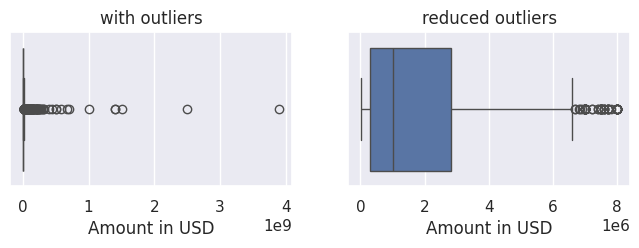

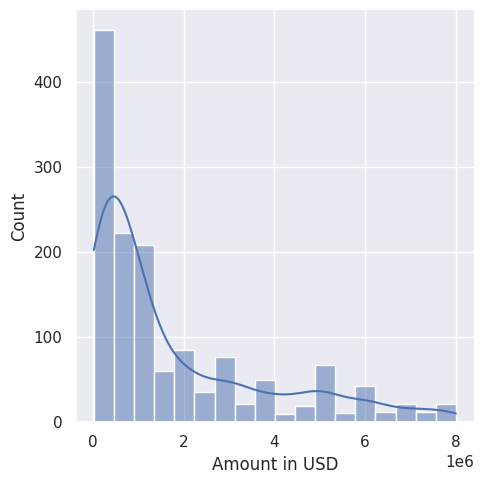

In [197]:
df4 = df3.copy()

q3 = df4["Amount in USD"].quantile(.75)

df4 = df4[~(df4["Amount in USD"]>=q3)]

print(df4.shape)
plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
plt.title("with outliers")
sns.boxplot(x ="Amount in USD", data=df3)
plt.subplot(1,2,2)
sns.boxplot(x ="Amount in USD", data=df4)
plt.title("reduced outliers")

sns.displot(x ="Amount in USD", data=df4 , kde = True)
plt.show()


In [198]:
# % of null values
df4.isnull().sum()/len(df3)*100

Date                 0.00
Startup Name         0.00
Industry Vertical    0.00
SubVertical          0.00
City  Location       0.00
Investors Name       0.00
Investment Type      0.00
Amount in USD       32.48
dtype: float64

In [199]:
df4.groupby('Investment Type').agg({"Amount in USD":["min",'median',"max","mean","std","count"]})

Amount in USD                                   \
                               min     median        max       mean   
Investment Type                                                       
angel funding            145000.00  232302.50  319605.00  232302.50   
angel/seed funding        80000.00  377300.00  500000.00  333650.00   
bridge round                   NaN        NaN        NaN        NaN   
corporate round                NaN        NaN        NaN        NaN   
debt funding             780000.00 3692000.00 7800000.00 3618328.28   
equity                  1000000.00 1000000.00 1000000.00 1000000.00   
inhouse funding         2443495.00 2443495.00 2443495.00 2443495.00   
maiden round            4500000.00 4500000.00 4500000.00 4500000.00   
mezzanine               1000000.00 1000000.00 1000000.00 1000000.00   
pre-series a             572000.00 2500000.00 5000000.00 2624571.43   
private equity           100000.00 3000000.00 8000000.00 3250337.48   
seed funding              18000.00  350000.00 7500000.00  488465.11   
seed/angel funding        39000.00  692000.00 5000000.00  994897.41   
series a                 500000.00 3150000.00 6000000.00 2942857.14   
series b                 486000.00 2645687.50 5750000.00 3071229.17   
series b (extension)    6000000.00 6000000.00 6000000.00 6000000.00   
series c                6590000.00 6590000.00 6590000.00 6590000.00   
series e                3000000.00 3000000.00 3000000.00 3000000.00   
series j                1000000.00 1000000.00 1000000.00 1000000.00   
term loan               6240000.00 6240000.00 6240000.00 6240000.00   
venture round            868600.00 2934300.00 5000000.00 2934300.00   

                                       
                            std count  
Investment Type                        
angel funding         123464.38     2  
angel/seed funding    179677.37     4  
bridge round                NaN     0  
corporate round             NaN     0  
debt funding         2227572.16    18  
equity                      NaN     1  
inhouse funding             NaN     1  
maiden round                NaN     1  
mezzanine                   NaN     1  
pre-series a         1594185.15     7  
private equity       2122384.42   602  
seed funding          525235.30   679  
seed/angel funding    993179.59    93  
series a             1706870.41    14  
series b             2260176.05     6  
series b (extension)        NaN     1  
series c                    NaN     1  
series e                    NaN     1  
series j                    NaN     1  
term loan                   NaN     1  
venture round        2921340.96     2

In [200]:
# Na values are filled with median values by grouping based on Investment type
df4["Amount in USD"] = df4.groupby('Investment Type',group_keys=False)['Amount in USD'].apply(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [201]:
df4['Amount in USD'].isnull().sum()

2

In [202]:
df4.dropna(inplace=True)

#final Dataset after cleaning and manipulating
df4

,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
4,2020-01-02,wealthbucket,fintech,online investment,new delhi,vinod khatumal,pre-series a,3000000.00
5,2020-01-02,fashor,fashion and apparel,embroiled clothes for women,mumbai,sprout venture partners,seed funding,1800000.00
8,2019-12-12,ecozen,technology,agritech,pune,sathguru catalyzer advisors,series a,6000000.00
15,2019-12-14,trell,video,experience discovery platform,bengalore,ruizheng investment,seed funding,2000000.00
19,2019-11-14,misters,health and wellness,men's health and wellness brand,gurgaon,"sauce.vc, rainforest ventures",series b,486000.00
...,...,...,...,...,...,...,...,...
2869,2015-04-29,tracxn,startup analytics platform,indian startup ecosystem trends analyzer & fun...,bangalore,saif partners,private equity,3500000.00
2870,2015-04-29,dazo,mobile food ordering app,Unknown,bangalore,"sumit jain, aprameya radhakrishna, alok goel, ...",seed funding,350000.00
2871,2015-04-29,tradelab,financial markets software,Unknown,bangalore,rainmatter,seed funding,400000.00


In [203]:
pd.options.display.float_format = '{:.2f}'.format
df4.describe()

,Amount in USD
count,2355.00
mean,1534002.90
std,1772542.32
min,18000.00
25%,350000.00
50%,500000.00
75%,3000000.00
max,8000000.00




---



**Problem Statement :**

Check the trend of investments over the years. To check the trend, find -
Total number of fundings done in each year.
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
Print year-wise total number of fundings also. Print years in ascending order.

**Note :**
There is some error in the 'Date' feature. Make sure to handle that.


,Year,Total Counts
0,2015,627
1,2016,895
2,2017,579
3,2018,206
4,2019,46
5,2020,2


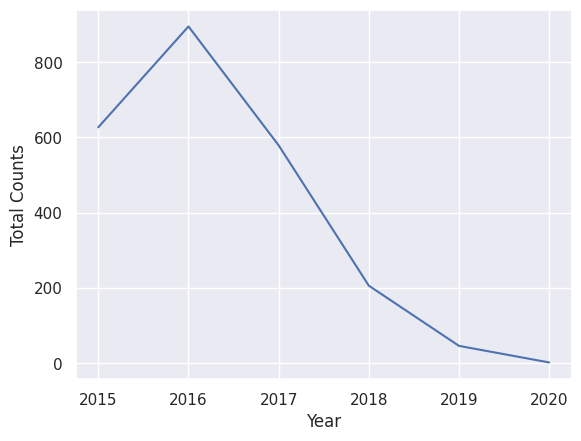

In [204]:
df4["Year"] = df4['Date'].dt.year
df_year_vs_funding = df4.groupby("Year")["Startup Name"].count().reset_index().rename(columns ={"Startup Name":"Total Counts"})
display(df_year_vs_funding)

sns.set_theme()
sns.lineplot(data=df_year_vs_funding, x = 'Year',y="Total Counts")
plt.show()

**Problem Statement :**

Find out which cities are generally chosen for starting a startup.
Find top 10 Indian cities which have most number of startups ?
Plot a pie chart and visualise it.
Print the city name and number of startups in that city also.

**Note :**
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the number of startups.


,Indian City,Count
0,bangalore,602
1,mumbai,465
2,new delhi,413
3,gurgaon,225
4,pune,94
5,hyderabad,88
6,noida,83
7,chennai,77
8,gurugram,35
9,ahmedabad,33


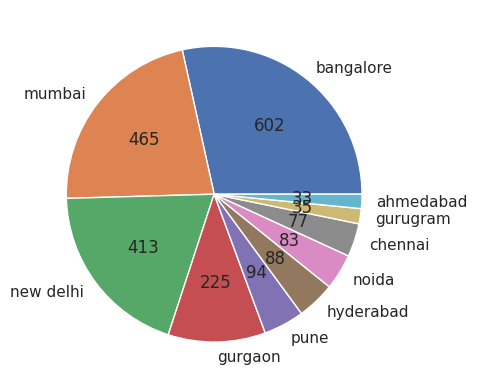

In [205]:
df5 = df4[df4["City  Location"].str.contains("|".join(indian_cities))].sort_values('City  Location').copy()
df5["Indian City"]= df5["City  Location"].replace(r"\s*/\s*",r"/",regex = True)
df5["Indian City"]= df5["Indian City"].replace(r"("+"|".join(indian_cities)+").*$",r"\1",regex = True)
df5["Indian City"]= df5["Indian City"].replace(r"^.+("+"|".join(indian_cities)+")",r"\1",regex = True)
# print(sorted(df5["Indian City"].unique()))
# print(df5["City  Location"].unique())

df_city_vs_count = df5.groupby("Indian City")["Startup Name"].count().nlargest(10).reset_index().rename(columns={"Startup Name":"Count"})

display(df_city_vs_count.sort_values("Count",ascending = False))

plt.pie(x=df_city_vs_count["Count"],labels=df_city_vs_count["Indian City"],autopct=lambda x: '{:.0f}'.format(np.round(x/100*df_city_vs_count["Count"].sum())))
plt.show()

**Problem Statement :**

Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.

**Note:**
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the percentage of funding.


,Indian City,Total Amount
0,bangalore,989912410.50
1,mumbai,766533315.00
2,new delhi,526611375.00
3,gurgaon,311107800.00
4,chennai,146018000.00
5,pune,142008000.00
6,hyderabad,124310230.00
7,noida,113584000.00
8,gurugram,74188523.00
9,ahmedabad,40278000.00


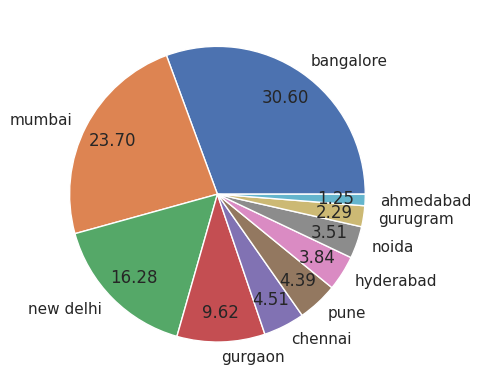

In [206]:
df_city_vs_TotalAmount = df5.groupby("Indian City")["Amount in USD"].sum().nlargest(10).reset_index().rename(columns={"Amount in USD":"Total Amount"})

display(df_city_vs_TotalAmount.sort_values("Total Amount",ascending = False))

plt.pie(x=df_city_vs_TotalAmount["Total Amount"],pctdistance=.8 ,labels=df_city_vs_TotalAmount["Indian City"],autopct=lambda x: '{:.2f}'.format(np.round(x, decimals=2)))
plt.show()

**Problem Statement :**

There are 4 different type of investments. Find out percentage of amount funded for each investment type.
Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

**Note :**
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
Print the investment type in descending order with respect to the percentage of the amount funded.


,Amount in USD
Investment Type 2,
Other,95964077.50
debt funding,67621909.00
private equity,2623323165.00
seed funding,606473372.00


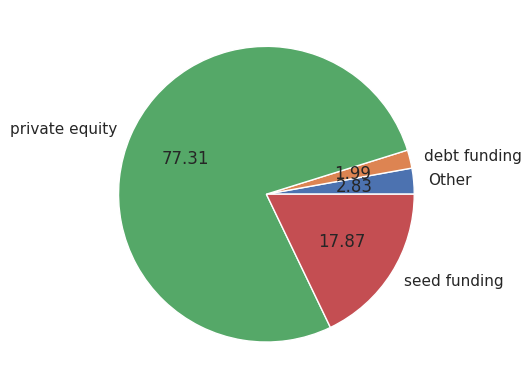

In [207]:
df6 = df5.copy()
# print(df6["Investment Type"].unique())
df6["Investment Type 2"] = df6["Investment Type"].apply(lambda x: "seed funding" if "seed" in x else x )
df6.loc[df6[~df6["Investment Type 2"].isin(["private equity","seed funding","debt funding","crowd funding"])].index,"Investment Type 2"]= "Other"
# df6[df6["Investment Type 2"]=="Other"]
df6 = df6[["Investment Type 2","Amount in USD"]].groupby("Investment Type 2").sum()
display(df6)
plt.pie(data=df6,x="Amount in USD", labels= df6.index, autopct = lambda x: '{:.2f}'.format(round(x,2)))
plt.show()

**Problem Statement :**

Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

**Note :**
Ecommerce is the right word in IndustryVertical, so correct it.
Print the industry in descending order with respect to the percentage of the amount funded.


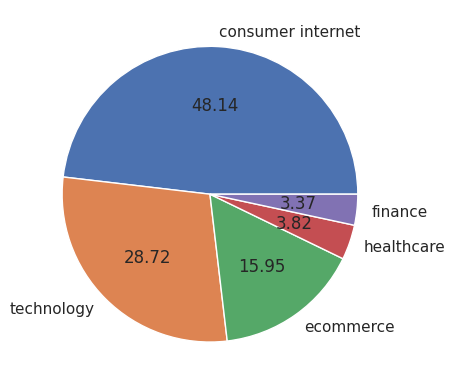

In [208]:
df7 = df5.groupby("Industry Vertical").agg({"Amount in USD":"sum"}).nlargest(5,columns='Amount in USD')

plt.pie(data=df7,x = 'Amount in USD',labels=df7.index, autopct = lambda x : "{:.2f}".format(round(x,2)))
plt.show()

**Problem Statement :**

Find top 5 startups with most amount of total funding.
Print the startup name in descending order with respect to amount of funding.

**Note:**
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.


,Amount in USD
Startup Name,
aye finance,24140000.00
toppr,18620820.00
indus os,17750000.00
magicpin,17600000.00
lendingkart,17150000.00


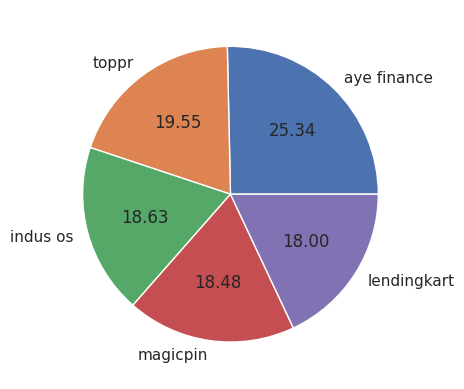

In [209]:
df8 = df5.groupby("Startup Name").agg({"Amount in USD":"sum"}).nlargest(5,columns='Amount in USD')
display(df8)

plt.pie(data=df8,x = 'Amount in USD',labels=df8.index, autopct = lambda x : "{:.2f}".format(round(x,2)))
plt.show()

**Problem Statement :**

Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
Print the startup name in descending order with respect to the number of funding round as integer value.

**Note:**
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.


,Amount in USD
Startup Name,
medinfi,6
holachef,5
toppr,5
aye finance,4
eazydiner,4


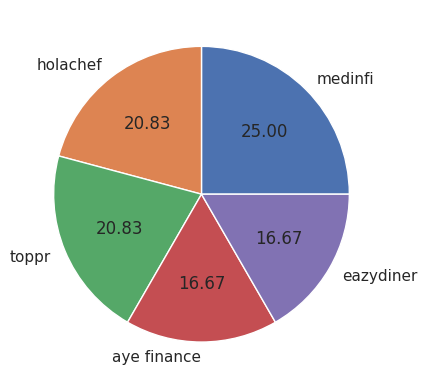

In [210]:
df9 = df5.groupby("Startup Name").agg({"Amount in USD":"count"}).nlargest(5,columns='Amount in USD')
display(df9)

plt.pie(data=df9,x = 'Amount in USD',labels=df9.index, autopct = lambda x : "{:.2f}".format(round(x,2)))
plt.show()

# Some Insights:


* Consumer Internet Industrial vertical based startup are most funded in

* Banglore and Mumbai based startup are funded more as per the data

* More money is flowing to start as private equity.

* The Number of Funding to startup is in descresing trend from 2015 to 2020.

# Extension to above case study

In [211]:
df5.head(5)

,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD,Year,Indian City
Sr No,,,,,,,,,,
1369,2016-09-13,shoekonnect,ecommerce,footwear & leather b2b app,agra,indian angels network,seed funding,350000.00,2016,agra
1292,2016-10-13,shoekonnect,ecommerce,b2b marketplace for shoes,agra,indian angel network,seed funding,350000.00,2016,agra
898,2017-04-17,lendingkart,consumer internet,lending platform for small businesses,ahmedabad,anicut capital,private equity,4650000.00,2017,ahmedabad
1861,2016-03-11,jollyfoodfellow,technology,food related marketing & branding platform,ahmedabad,janak parikh,seed funding,350000.00,2016,ahmedabad
2785,2015-05-18,awaaz de,enterprise communication platform,mobile solutions for social impact,ahmedabad,samir shah,seed funding,350000.00,2015,ahmedabad


**Problem:1**

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend decide the location. NCR includes Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups have received funding maximum number of times. Plot the bar graph between location and number of funding. Take the city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take the city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

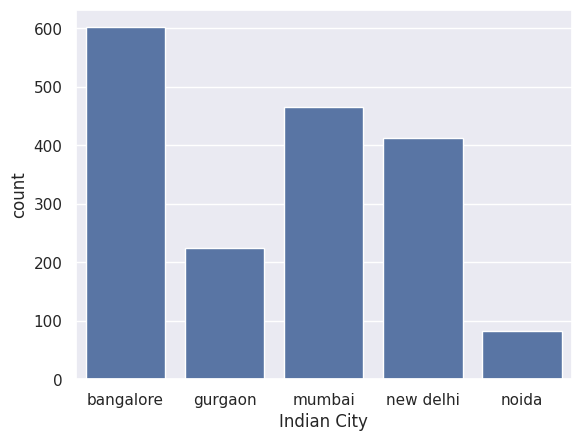

In [212]:
df_bar1 = df5[df5["Indian City"].isin(["bangalore","mumbai","gurgaon","noida","new delhi"])].groupby("Indian City").agg({"Amount in USD":"count"})

sns.barplot(data=df_bar1,x='Indian City',y="Amount in USD")
plt.ylabel("count")
plt.show()

**Problem:2**

Even after trying so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [213]:
investors_list = []
for i in df5["Investors Name"]:
  temp = i.split(",")
  investors_list.extend(temp)
# print(investors_list)

investors_list = [i.strip() for i in investors_list]

df_inv = pd.DataFrame({"Investors":investors_list})
df_inv = df_inv[~df_inv['Investors'].isin(["","undisclosed investors","undisclosed investor"])].value_counts().nlargest(5)
df_inv

Investors           
indian angel network    44
blume ventures          42
accel partners          38
kalaari capital         33
ratan tata              27
dtype: int64

**Problem:3**

After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalizing the previous list, you want to improvise it by finding the top 5 investors who have invested in a different number of startups. This list will be more helpful than your previous list in finding the investment for your friend's startup. Find the top 5 investors who have invested a maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [214]:
inv_with_startup = []

for name,data  in df5.groupby("Startup Name")["Investors Name"]:
  temp_set = set()
  for i in data:
    temp = i.split(",")
    temp = [k.strip() for k in temp]
    temp_set = temp_set.union({*temp})
  inv_with_startup.extend([*temp_set])


df_inv_startup_comb = pd.DataFrame({"Investors":inv_with_startup})
df_inv_startup_comb = df_inv_startup_comb[~df_inv_startup_comb['Investors'].isin(["","undisclosed investors","undisclosed investor"])].value_counts().nlargest(5)
df_inv_startup_comb

Investors           
indian angel network    44
blume ventures          36
accel partners          35
kalaari capital         30
ratan tata              26
dtype: int64

**Problem:4**

Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend's startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistakes. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [215]:
inv_with_startup = []

for name,data  in df5[df5["Investment Type"].isin(["seed funding","crowd funding"])].groupby("Startup Name")["Investors Name"]:
  temp_set = set()
  for i in data:
    temp = i.split(",")
    temp = [k.strip() for k in temp]
    temp_set = temp_set.union({*temp})
  inv_with_startup.extend([*temp_set])


df_inv_startup_comb = pd.DataFrame({"Investors":inv_with_startup})
df_inv_startup_comb = df_inv_startup_comb[~df_inv_startup_comb['Investors'].isin(["","undisclosed investors","undisclosed investor"])].value_counts().nlargest(5)
df_inv_startup_comb

Investors           
indian angel network    36
rajan anandan           23
letsventure             17
kunal shah              14
anupam mittal           13
dtype: int64

**Problem:5**

Due to your immense help, your friend startup successfully got seed funding and it is in operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a savior to help your friend and want to create a list of probable new investors. Before moving forward you remember your investor friend's advice that finding the investors by analyzing the investment type. Since your friend's startup is not in the early phase it is in a growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistakes. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [216]:
inv_with_startup = []

for name,data  in df5[df5["Investment Type"].isin(["private equity"])].groupby("Startup Name")["Investors Name"]:
  temp_set = set()
  for i in data:
    temp = i.split(",")
    temp = [k.strip() for k in temp]
    temp_set = temp_set.union({*temp})
  inv_with_startup.extend([*temp_set])


df_inv_startup_comb = pd.DataFrame({"Investors":inv_with_startup})
df_inv_startup_comb = df_inv_startup_comb[~df_inv_startup_comb['Investors'].isin(["","undisclosed investors","undisclosed investor"])].value_counts().nlargest(5)
df_inv_startup_comb

Investors      
accel partners     29
blume ventures     25
kalaari capital    23
sequoia capital    19
ratan tata         17
dtype: int64